## EXTRA CHAPTER 2 - Victor Perez Armenta

In [46]:
import numpy as np
from scipy import signal
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive, fixed, widgets

noche = cv2.imread('noche.jpeg')
noche = cv2.cvtColor(noche, cv2.COLOR_BGR2RGB)

Despues de contarle a mi madre todo lo que voy aprendiendo en las practicas de Visión por computador, me ha pedido ayuda con la siguiente foto:

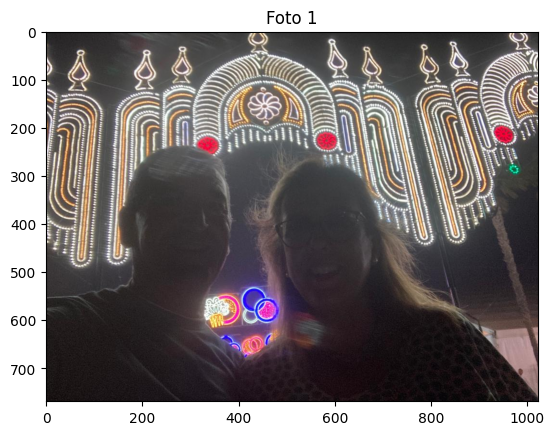

In [47]:
plt.title('Foto 1')
plt.imshow(noche)
plt.show()




# PROCEDIMIENTO
Para la primera foto me ha pedido que se vea un poco más clara y con el menor ruido poisble. El problema que encontramos en esa primera foto es la gran cantidad de pixeles oscuros en la imagen, por lo que podriamos aplicar una ecualización del histograma.

In [89]:
def equalize_chart(image, verbose=False):
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    out_image = np.copy(image)
    
    out_image[:,:,0] = cv2.equalizeHist(out_image[:,:,0])

    out_image = cv2.cvtColor(out_image, cv2.COLOR_YCrCb2RGB)
    if verbose:
        plt.imshow(out_image)
        plt.title('Equalized histogram image')
    return out_image

In [77]:
# luna1 = cv2.cvtColor(luna1, cv2.)
noisy = equalize_chart(noche)
interactive(equalize_chart, image=fixed(noche), verbose=fixed(True))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [90]:
def gauss_formula(x,sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x*x) / (2*sigma*sigma))

def gaussian_filter(image, w_kernel, sigma, verbose=False):

    s = sigma
    w = w_kernel
    kernel_1D = np.float32([gauss_formula(z,s) for z in range(-w,w+1)]) # Evaluate the gaussian in "expression"
    vertical_kernel = kernel_1D.reshape(2*w+1,1) # Reshape it as a matrix with just one column
    horizontal_kernel = kernel_1D.reshape(1,2*w+1) # Reshape it as a matrix with just one row
    kernel = signal.convolve2d(vertical_kernel, horizontal_kernel) # Get the 2D kernel

    smoothed_img = cv2.filter2D(image,cv2.CV_16S,kernel)
    
    if verbose:
        plt.imshow(smoothed_img, cmap = 'gray')
        plt.title('Gaussian filter')
    
    return smoothed_img

In [79]:
interactive(gaussian_filter, image = fixed(noisy),w_kernel=(0,5,1), sigma=(1,3,0.3), verbose=fixed(True))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), FloatSlider(value=1.9, description='s…

Hemos conseguido eliminar un poco el ruido y aclarar la imagen un poco tal y como me pido mi madre.